# Tugas 6
### **Prediksi Data Iris Menggunakan Algoritma Pohon Keputusan**
**Decision tree** adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko.

In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#source data
dataset_url = "https://raw.githubusercontent.com/indyrajanuar/datamining/main/IRIS.csv"
#create dataframe
df = pd.read_csv(dataset_url)

In [16]:
#basic information regarding data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data berisi total 5 fitur di mana 4 fitur (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) adalah fitur independen dan 1 fitur (Species) adalah variabel dependen atau target.

Semua fitur Independen memiliki nilai float bukan nol dan variabel target memiliki label kelas (Iris-setosa, Iris-versicolor, Iris-virginica)

## **Exploring Some New Features**

Disini saya hanya mencoba mencari beberapa fitur baru dengan bantuan fitur yang sudah ada. Mengambil perbedaan masing-masing fitur satu sama lain untuk mendapatkan lebih banyak informasi dan memvisualisasikannya dengan menggunakan plot.

In [20]:
#Just trying to explore some new feature using the given data...

df['Sepal_diff'] = df['sepal_length']-df['sepal_width']
df['Petal_diff'] = df['petal_length']-df['petal_width']

In [21]:
df['Sepal_petal_len_diff'] = df['sepal_length']-df['petal_length']
df['Sepal_petal_width_diff'] = df['sepal_width']-df['petal_width']

In [22]:
df['Sepal_petal_len_wid_diff'] = df['sepal_length']-df['petal_width']
df['Sepal_petal_wid_len_diff'] = df['sepal_width']-df['petal_length']

In [23]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,Sepal_diff,Petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


Sekarang menemukan hubungan antara fitur baru berdasarkan label kelas menggunakan plot pasangan.

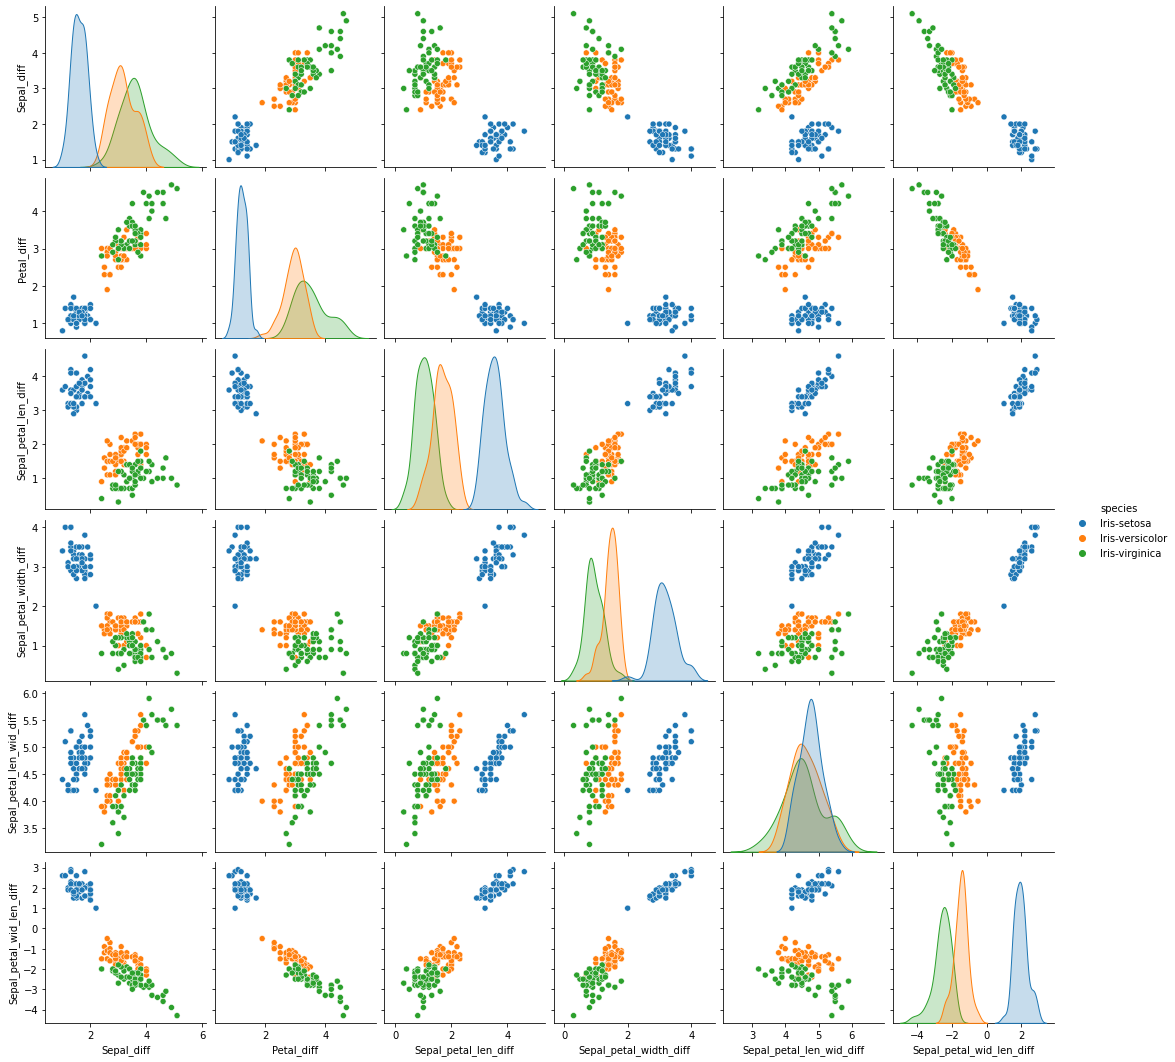

In [27]:
# Finding relationship b/w new feature based on class labels...

sns.pairplot(df[['species', 'Sepal_diff', 'Petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
       'Sepal_petal_wid_len_diff']], hue='species')
plt.show()

### **Building Classification Model**

[Text(0.45454545454545453, 0.9166666666666666, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.36363636363636365, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5454545454545454, 0.75, 'X[4] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.36363636363636365, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.2727272727272727, 0.4166666666666667, 'X[2] <= 5.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.18181818181818182, 0.25, 'X[0] <= 5.6\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(0.7272727272727273, 0

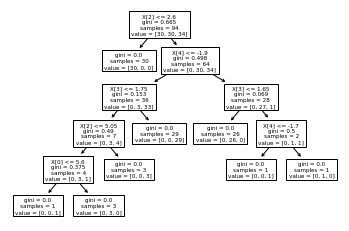

In [29]:
#Now try to create a model to solve our task
#As per our analysis, we can't find much information from new feature which can helpful in solving our problem...
#For solving our task I have selected few features amongs all to build up our best model..

'''Importing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''


X = df[['sepal_length', 'sepal_width','petal_length', 'petal_width','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = df['species']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

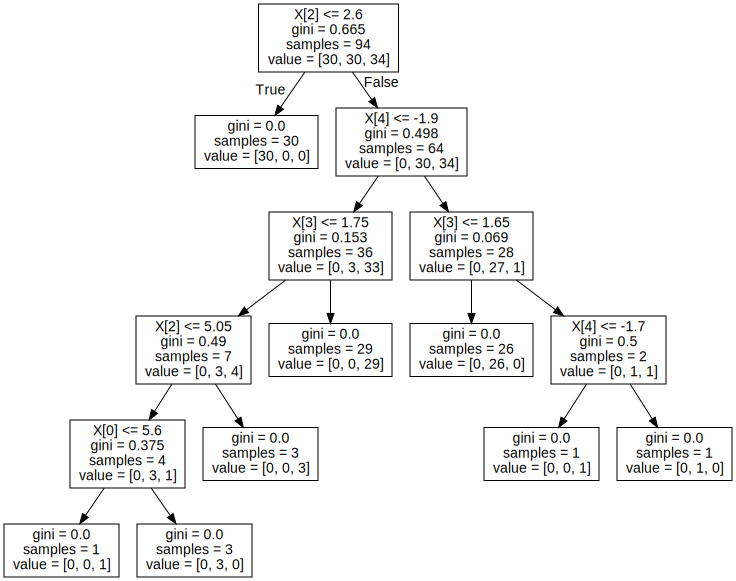

In [30]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

Karena model kami telah dilatih….
Sekarang kita dapat memvalidasi pohon keputusan kita menggunakan metode validasi silang untuk mendapatkan akurasi atau skor kinerja model kita.

In [31]:
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9146505376344086


In [32]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [33]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

Seperti yang kami ketahui, fitur yang kami pilih berfungsi dengan baik dan model memberikan skor akurasi yang sangat baik pada validasi atau data uji aktual. Jadi sekarang kita bisa melatih model kita pada train dataset yang sebenarnya dengan fitur yang dipilih untuk mengevaluasi/menerapkan model kita dalam kasus dunia nyata.

[Text(0.4, 0.9375, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.3, 0.8125, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.8125, 'X[4] <= -1.9\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3, 0.6875, 'X[3] <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(0.2, 0.5625, 'X[4] <= -2.6\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(0.1, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.3, 0.4375, 'X[5] <= 0.9\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.3125, 'X[2] <= 5.05\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.5, 0.1875, 'X[5] <= 1.2\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.5625, 'gini = 

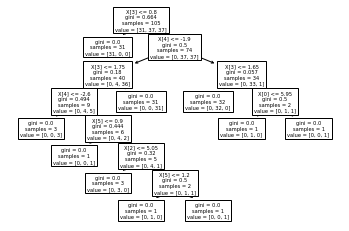

In [34]:
'''Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(Iris_Fclf)

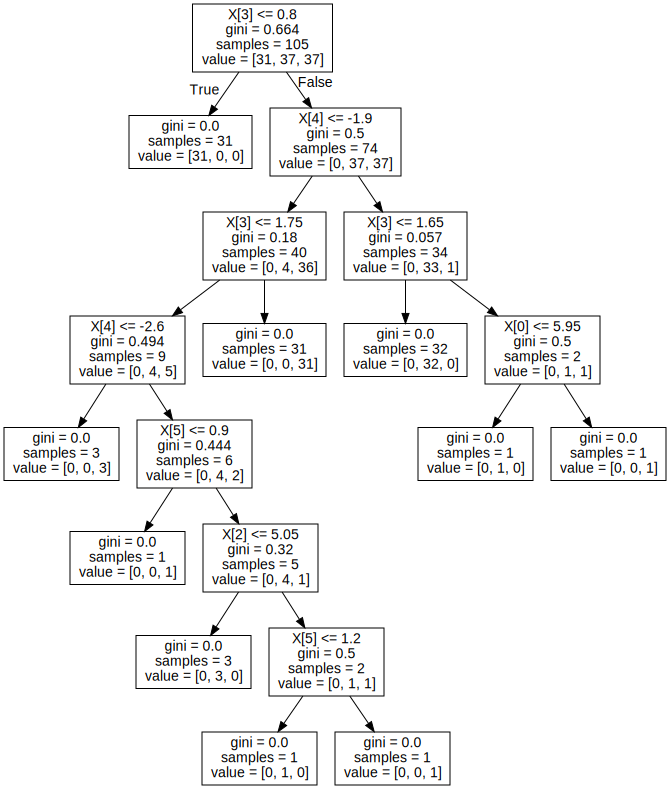

In [35]:
#Final Decision tree build for deploying in real world cases....

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [36]:
#Checking the performance of model on Actual Test data...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 1, 12]],

       [[31,  1],
        [ 0, 13]]])

In [37]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
